# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:

# Definir os intervalos e as respectivas categorias
bins = [0, 3, 5, 7, 10]  # Limites dos intervalos
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']  # Nomes das categorias

# Criar a nova coluna 'APGAR5_categoria' com as categorias
df['APGAR5_categoria'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, right=True)

# Exibir as primeiras linhas do DataFrame para verificar a nova coluna
print(df[['APGAR5', 'APGAR5_categoria']].head())

   APGAR5 APGAR5_categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

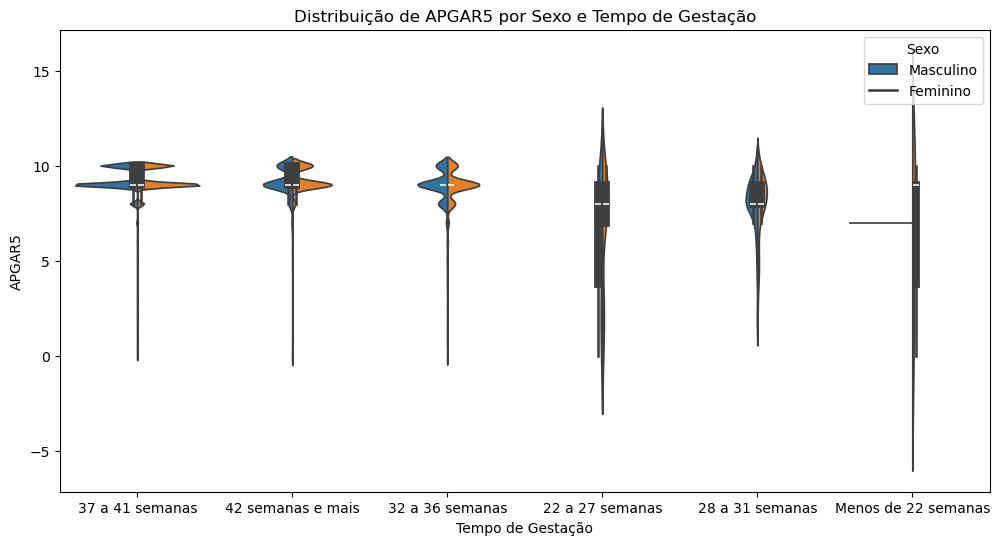

In [5]:
# Filtrando colunas relevantes e removendo valores nulos
df_filtered = df[['APGAR5', 'SEXO', 'GESTACAO']].dropna()

# Criando o gráfico de violino para comparar a distribuição de APGAR5
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtered, x='GESTACAO', y='APGAR5', hue='SEXO', split=True)
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper right', labels=['Masculino', 'Feminino'])
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [9]:
 # Criar a tabela cruzada
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'], margins=True, margins_name="Total")

# Exibir a tabela cruzada
print(tabela_cruzada)

APGAR5               0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0    9.0  \
GESTACAO                                                                   
22 a 27 semanas        7    0    8    6    1    0    2   10    24     19   
28 a 31 semanas        0    0    2    1    5    7    7   11    61     55   
32 a 36 semanas        2    2    2    2    8   11   17   56   362   1307   
37 a 41 semanas        5   20    3    5    7   21   45  151  1417  13565   
42 semanas e mais      1    0    0    0    0    1    1    5    44    423   
Menos de 22 semanas    1    0    1    0    0    0    0    1     0      3   
Total                 16   22   16   14   21   40   72  234  1908  15372   

APGAR5               10.0  Total  
GESTACAO                          
22 a 27 semanas         8     85  
28 a 31 semanas        13    162  
32 a 36 semanas       465   2234  
37 a 41 semanas      7284  22523  
42 semanas e mais     223    698  
Menos de 22 semanas     1      7  
Total                7994  25709  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [11]:
# Calcular os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Adicionar uma coluna de total à tabela de percentuais
percentuais_linha['Total'] = percentuais_linha.sum(axis=1)

# Exibir a tabela de percentuais
print(percentuais_linha)

APGAR5                    0.0       1.0       2.0       3.0       4.0  \
GESTACAO                                                                
22 a 27 semanas      4.117647  0.000000  4.705882  3.529412  0.588235   
28 a 31 semanas      0.000000  0.000000  0.617284  0.308642  1.543210   
32 a 36 semanas      0.044763  0.044763  0.044763  0.044763  0.179051   
37 a 41 semanas      0.011100  0.044399  0.006660  0.011100  0.015540   
42 semanas e mais    0.071633  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  7.142857  0.000000  7.142857  0.000000  0.000000   
Total                0.031118  0.042787  0.031118  0.027228  0.040842   

APGAR5                    5.0       6.0       7.0        8.0        9.0  \
GESTACAO                                                                  
22 a 27 semanas      0.000000  1.176471  5.882353  14.117647  11.176471   
28 a 31 semanas      2.160494  2.160494  3.395062  18.827160  16.975309   
32 a 36 semanas      0.246195  0.380483  1

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [25]:
# Filtrar para partos prematuros (menos de 37 semanas)
partos_prematuros = percentuais_linha.loc[percentuais_linha.index < 37]

# Verificar se a tabela de partos prematuros não está vazia
if not partos_prematuros.empty:
    # Criar gráfico de barras
    plt.figure(figsize=(10, 6))
    partos_prematuros.plot(kind='bar', stacked=True)
    plt.title('Distribuição Percentual de APGAR5 em Partos Prematuros (< 37 semanas)')
    plt.xlabel('Tempo de Gestação (semanas)')
    plt.ylabel('Percentual de APGAR5')
    plt.legend(title='APGAR5', loc='upper right')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Não há dados para partos prematuros com APGAR5 na tabela.")


Não há dados para partos prematuros com APGAR5 na tabela.


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

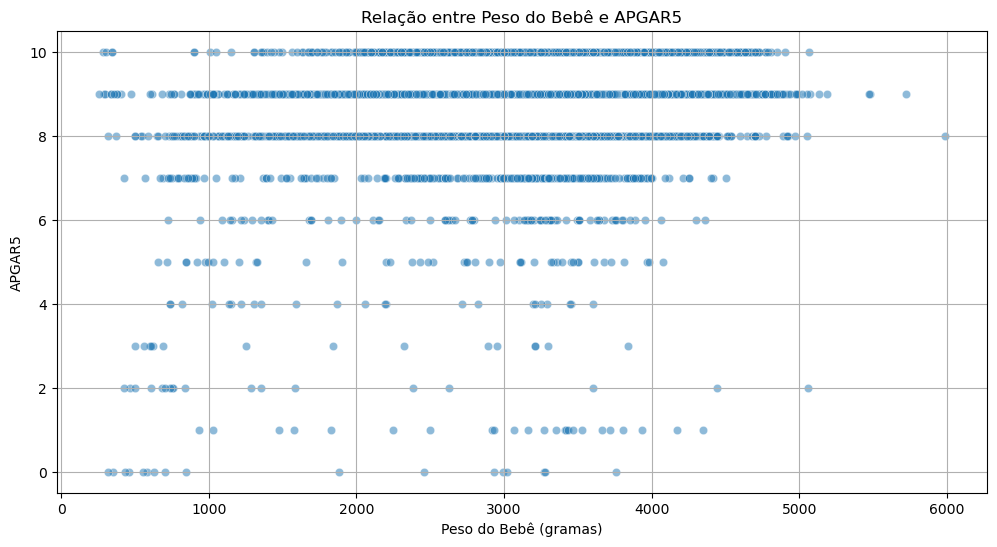

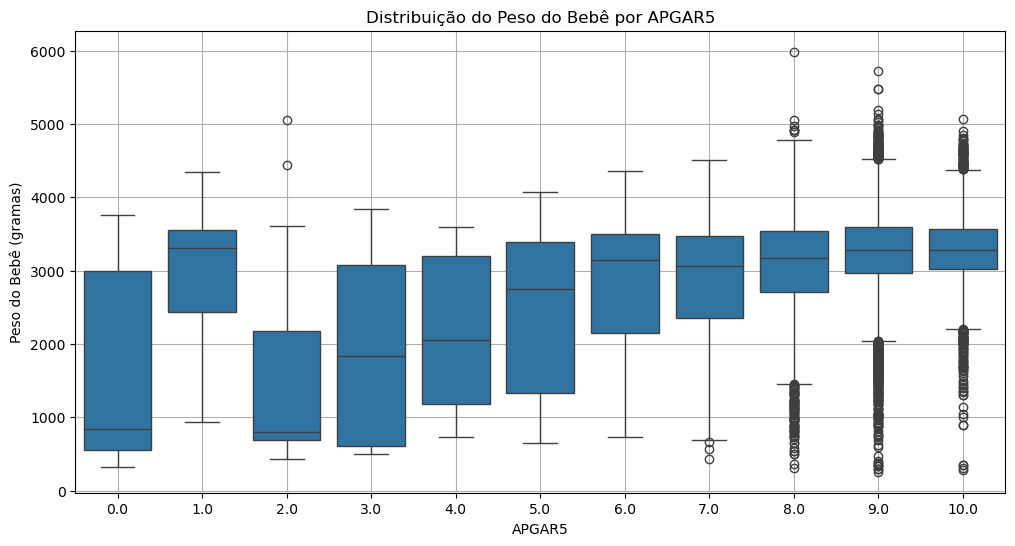

In [27]:
# Remover valores nulos de PESO e APGAR5
df_filtered = df[['PESO', 'APGAR5']].dropna()

# Gráfico de Dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='PESO', y='APGAR5', alpha=0.5)
plt.title('Relação entre Peso do Bebê e APGAR5')
plt.xlabel('Peso do Bebê (gramas)')
plt.ylabel('APGAR5')
plt.grid()
plt.show()

# Boxplot de Peso por categorias de APGAR5
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='APGAR5', y='PESO')
plt.title('Distribuição do Peso do Bebê por APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')
plt.grid()
plt.show()